# 🧼 Handling Missing Data in Practice

This notebook demonstrates how to clean missing data using pandas.

In [1]:
# 1. Load libraries and create the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataset with missing values
data = {
    'id': range(1, 11),
    'age': [25, 30, np.nan, 22, 28, np.nan, 35, 29, 40, np.nan],
    'income': [50000, 60000, 55000, np.nan, 52000, 58000, np.nan, 62000, 70000, 65000],
    'gender': ['male', 'female', np.nan, 'female', 'male', 'female', 'male', np.nan, 'female', 'male'],
}

df = pd.DataFrame(data)
df

,id,age,income,gender
0,1,25.0,50000.0,male
1,2,30.0,60000.0,female
2,3,NaN,55000.0,NaN
3,4,22.0,NaN,female
4,5,28.0,52000.0,male
5,6,NaN,58000.0,female
6,7,35.0,NaN,male
7,8,29.0,62000.0,NaN
8,9,40.0,70000.0,female
9,10,NaN,65000.0,male


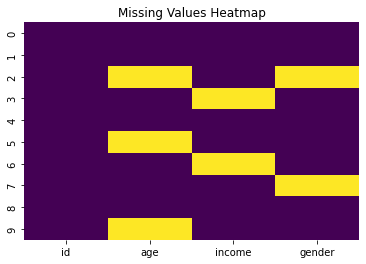

id        0
age       3
income    2
gender    2
dtype: int64

In [2]:
# 2. Visualize missing values
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Count missing per column
df.isnull().sum()

In [3]:
# 3. Drop missing values (only for comparison)
df_dropped = df.dropna()
df_dropped

,id,age,income,gender
0,1,25.0,50000.0,male
1,2,30.0,60000.0,female
4,5,28.0,52000.0,male
8,9,40.0,70000.0,female


In [4]:
# 4. Fill missing values (simple strategy)

# Fill age with median
df['age_filled'] = df['age'].fillna(df['age'].median())

# Fill income with mean
df['income_filled'] = df['income'].fillna(df['income'].mean())

# Fill gender with placeholder
df['gender_filled'] = df['gender'].fillna('unknown')

df[['id', 'age', 'age_filled', 'income', 'income_filled', 'gender', 'gender_filled']]

,id,age,age_filled,income,income_filled,gender,gender_filled
0,1,25.0,25.0,50000.0,50000.0,male,male
1,2,30.0,30.0,60000.0,60000.0,female,female
2,3,NaN,29.0,55000.0,55000.0,NaN,unknown
3,4,22.0,22.0,NaN,59000.0,female,female
4,5,28.0,28.0,52000.0,52000.0,male,male
5,6,NaN,29.0,58000.0,58000.0,female,female
6,7,35.0,35.0,NaN,59000.0,male,male
7,8,29.0,29.0,62000.0,62000.0,NaN,unknown
8,9,40.0,40.0,70000.0,70000.0,female,female
9,10,NaN,29.0,65000.0,65000.0,male,male


In [5]:
# 5. Add indicator columns for missingness

df['age_missing'] = df['age'].isna()
df['income_missing'] = df['income'].isna()

df[['id', 'age', 'age_missing', 'income', 'income_missing']]

,id,age,age_missing,income,income_missing
0,1,25.0,False,50000.0,False
1,2,30.0,False,60000.0,False
2,3,NaN,True,55000.0,False
3,4,22.0,False,NaN,True
4,5,28.0,False,52000.0,False
5,6,NaN,True,58000.0,False
6,7,35.0,False,NaN,True
7,8,29.0,False,62000.0,False
8,9,40.0,False,70000.0,False
9,10,NaN,True,65000.0,False


In [6]:
# 6. Final cleaned dataset
df_cleaned = df.copy()
df_cleaned['age'] = df_cleaned['age_filled']
df_cleaned['income'] = df_cleaned['income_filled']
df_cleaned['gender'] = df_cleaned['gender_filled']
df_cleaned = df_cleaned.drop(columns=['age_filled', 'income_filled', 'gender_filled'])

df_cleaned

,id,age,income,gender,age_missing,income_missing
0,1,25.0,50000.0,male,False,False
1,2,30.0,60000.0,female,False,False
2,3,29.0,55000.0,unknown,True,False
3,4,22.0,59000.0,female,False,True
4,5,28.0,52000.0,male,False,False
5,6,29.0,58000.0,female,True,False
6,7,35.0,59000.0,male,False,True
7,8,29.0,62000.0,unknown,False,False
8,9,40.0,70000.0,female,False,False
9,10,29.0,65000.0,male,True,False
